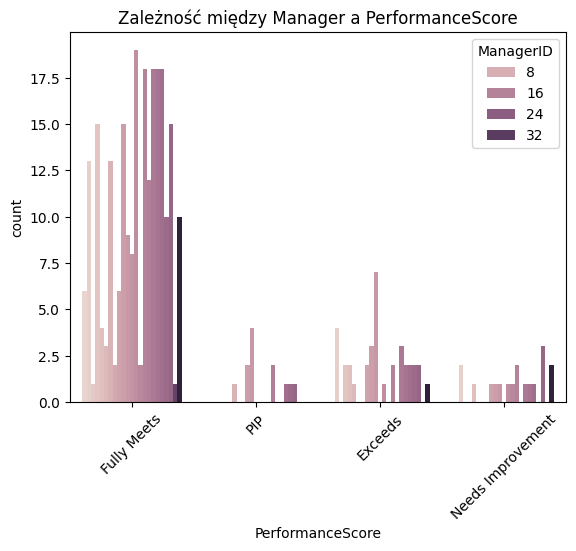

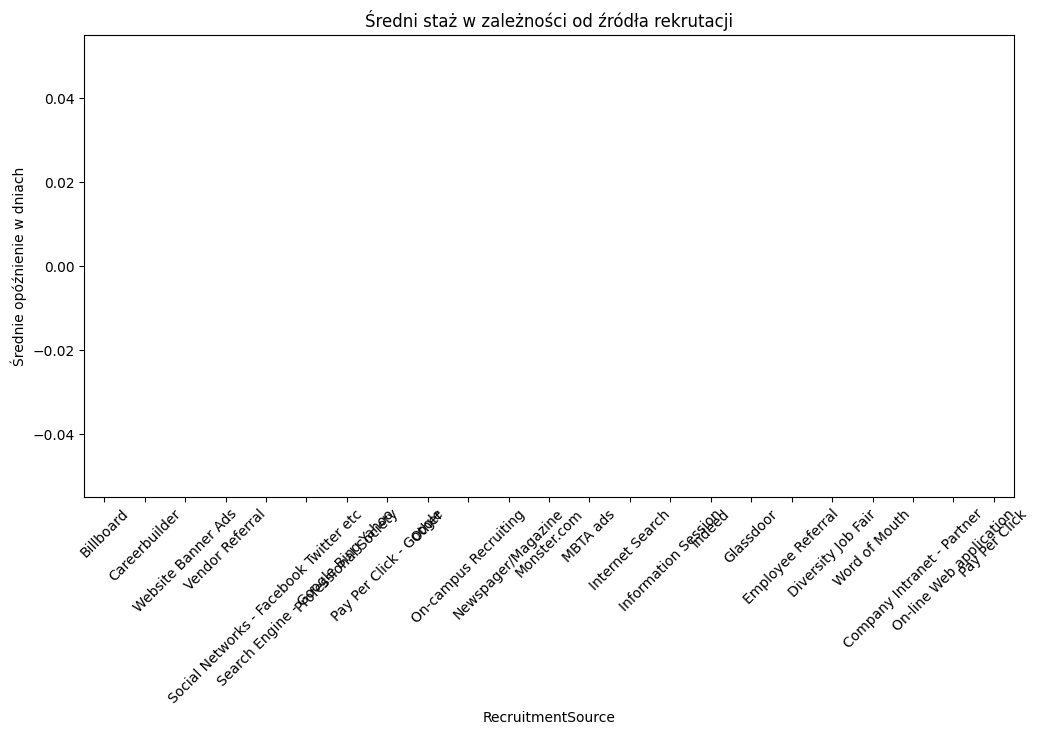

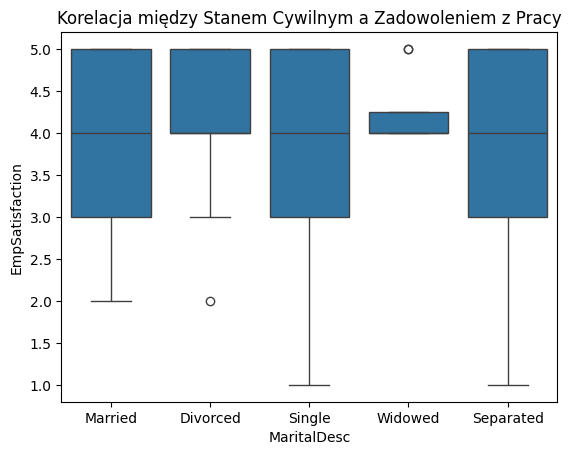

0      36.0
1      39.0
2      37.0
3      38.0
4      35.0
       ... 
396     NaN
397     NaN
398     NaN
399     NaN
400     NaN
Name: Age, Length: 401, dtype: float64


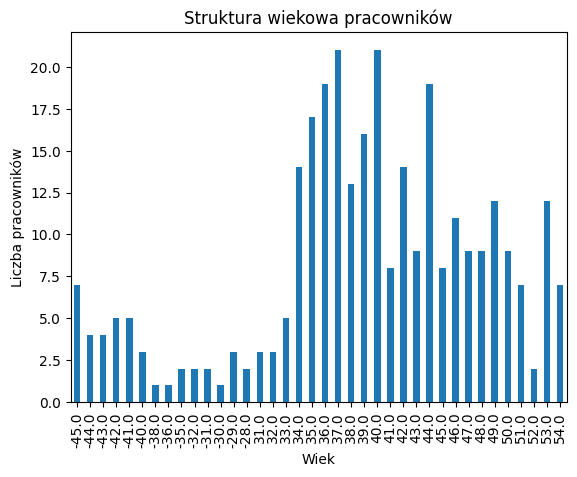

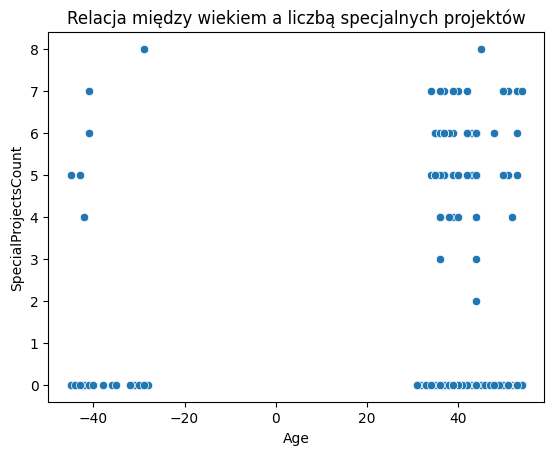

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytaj dane
df = pd.read_csv('HRDataset.csv')

# Pytanie 1: Zależność między Manager a PerformanceScore
sns.countplot(x='PerformanceScore', hue='ManagerID', data=df)
plt.xticks(rotation=45)
plt.title('Zależność między Manager a PerformanceScore')
plt.show()

# Pytanie 2: Najlepsze źródła pozyskania pracownika dla długiego stażu
plt.figure(figsize=(12, 6))  # Dodaj tę linię, aby zwiększyć szerokość wykresu
source_duration = df.groupby('RecruitmentSource')['DaysLateLast30'].mean().sort_values(ascending=False)
source_duration.plot(kind='bar')
plt.title('Średni staż w zależności od źródła rekrutacji')
plt.ylabel('Średnie opóźnienie w dniach')

# Dodaj te dwie linie, aby obrócić etykiety osi x i zmniejszyć rozmiar czcionki
plt.xticks(rotation=45)
plt.xticks(fontsize=10)

plt.show()

# Pytanie 3: Korelacja między MartialDesc a EmpSatisfaction
sns.boxplot(x='MaritalDesc', y='EmpSatisfaction', data=df)
plt.title('Korelacja między Stanem Cywilnym a Zadowoleniem z Pracy')
plt.show()

# Pytanie 4: Struktura wiekowa pracowników
# Skorzystaj z aktualnej daty, aby obliczyć wiek pracowników
current_year = pd.to_datetime('now').year

# Konwertuj 'DOB' do poprawnego formatu i oblicz wiek
df['DOB'] = pd.to_datetime(df['DOB'], format='%m/%d/%y')
df['Age'] = current_year - df['DOB'].dt.year

# Wyświetl informacje o wieku, aby upewnić się, że są poprawne
print(df['Age'])

age_structure = df['Age'].value_counts().sort_index()
age_structure.plot(kind='bar')
plt.title('Struktura wiekowa pracowników')
plt.xlabel('Wiek')
plt.ylabel('Liczba pracowników')
plt.show()

# Pytanie 5: Czy starsi pracownicy pracują nad większą liczbą projektów?
sns.scatterplot(x='Age', y='SpecialProjectsCount', data=df)
plt.title('Relacja między wiekiem a liczbą specjalnych projektów')
plt.show()
